In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

from bodypose.training.preprocessing import create_density_map

In [11]:
imgPath = "./dataset/coco/validation/val2014_1000.png"
kptsPath = imgPath.replace(".png", "_kpts.txt")
cntrsPath = imgPath.replace(".png", "_cntrs.txt")

kpts = tf.convert_to_tensor(np.loadtxt(kptsPath).astype(np.float32))
cntrs = tf.convert_to_tensor(np.loadtxt(cntrsPath).astype(np.float32))

print(kpts[:,:2])

tf.Tensor(
[[0.4859375  0.26458332]
 [0.496875   0.25      ]
 [0.4765625  0.25      ]
 [0.5125     0.25625   ]
 [0.465625   0.25833333]
 [0.5328125  0.3375    ]
 [0.44375    0.33333334]
 [0.5484375  0.4375    ]
 [0.4234375  0.425     ]
 [0.5234375  0.45416668]
 [0.434375   0.44166666]
 [0.5109375  0.5229167 ]
 [0.4515625  0.5208333 ]
 [0.5046875  0.6625    ]
 [0.459375   0.65      ]
 [0.5015625  0.80625   ]
 [0.4609375  0.7895833 ]], shape=(17, 2), dtype=float32)


In [38]:
pdfs = create_density_map(kpts[:, :2], 52)
pdfs.shape

centers_pdf = create_density_map(cntrs[:,:2], 52)
centers_pdf.shape

TensorShape([2704, 12])

(-0.5, 639.5, 479.5, -0.5)

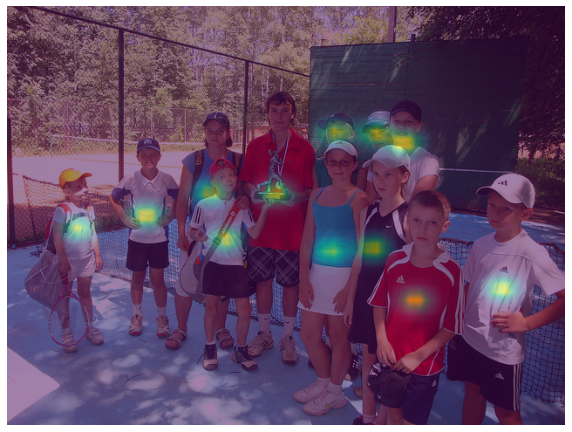

In [75]:
img = cv2.imread(imgPath)[:,:, ::-1]
img_size = img.shape[:2]

pdf1 = pdf.numpy().reshape(52, 52)
pdf1 = cv2.resize(pdf1, img_size[::-1])

fig =  plt.figure(figsize=(10,10))

plt.imshow(img)
plt.imshow(pdf1, alpha=.5)
plt.axis("off")

In [87]:
from matplotlib.artist import get


print(centers_pdf.shape)

def get_max_idxs(pdfs):
    idxs = tf.argmax(centers_pdf, axis=0)
    return idxs

idxs = get_max_idxs(centers_pdf)
idxs

(2704, 12)


<tf.Tensor: shape=(12,), dtype=int64, numpy=
array([1364,  814, 1221, 1476, 1866, 1910, 1594, 1590,  921, 1214, 1410,
        810])>

In [89]:
pdf = tf.math.reduce_sum(centers_pdf, axis=-1)
tf.where

print(pdf.numpy().max())
pdf.shape


SyntaxError: cannot assign to function call (520166153.py, line 2)

In [79]:
idxs[:,0]+1

<tf.Tensor: shape=(12,), dtype=int64, numpy=
array([1365,  815, 1222, 1477, 1867, 1911, 1595, 1591,  922, 1215, 1411,
        811])>